#**Problem 2 Male and Female Handwriting Digit**
 
Handwriting is a unique quality of human being, every person has unique handwriting that is very hard to copy but there can be some similarities
Between male and female handwriting. we will classify the difference between Male and Female Handwritting Digit using logistic regression.
 
Differences between Male and Female Handwriting Digit can be used in various applications like Archeology, forensic department. In this assignment, our main goal will be to achieve a good result using logistic regression and tuning hyperparameters correctly to get a better result.
 
 
 
 
 
#**Dataset**
 
 
> For this experiment, we will use the dataset [Ekush](https://shahariarrabby.github.io/ekush/#download) which is available in **Github**. 
There will be a total of **30830** images, and it was split in a **90:10** ratio. **90%** (**27747**) of data is used in training and **10%** (**3083**) was used in testing.Whole dataset was shuffled before spliting , so that traning and testing dataset can have both label data. 
 
**Snapshot from Dataset**

><div align="center">
<img src="https://drive.google.com/uc?id=1GhuJfYchOjfNoBtwkpWivPRQinegMYwy" width="600">
</div>
 
 
#**Experimental Setup**
 
 
> All of these experiments were performed using Google Colab free GPU, Models were created in PyTorch. 
 
 
During the whole experiment,
* The height and width of the input was **28*28 =784** 
* Output dimension was **(0,1)=2**
* Each batch size was **256**
* The number of iteration was **4000**
* **Softmax** activation function was used 
* GPU **Tesla T4** was available 
* Number of Epochs **332**
 
- **totaldata:** 30830
 
 
 
 
> - **minibatch:** 256
- **iterations:** 4,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 4000 \div \frac{30830}{256} = 332.14 == 332 $
 
We will use different optimizer(SGD and Adam) and learning rate to achieve better performance
 
# **Result**
 
 
| Experiment Number      | Optimizer     | Learning Rate    | | Accurecy of last 500 iterations    |
| :------------- | :----------: | :-----------: || :-----------: |
|  1 |SGD   | 0.0001    ||51.41 |
|  2 |SGD   | 0.0005    ||  50.02 |
| 3   | SGD | 0.0010 || 49.92 |
|  4 |Adam   | 0.0001    ||51.05 |
|  5 |Adam  | 0.02   || 50.86 |
|  6 |Adam   | 0.05    || 48.3 | |
 
 
From the result, it is can be said that when **SGD** optimizer is used for the first setup accuracy was **51.41** and loss was **increasing**, and when we set the learning rate 0.0005 accuracy was **50.02** which was less than the last setup, and then when the learning rate was increased to **0.0010** accuracy decreased to **49.92** and loss graph was **decreasing**, so it can be assume that optimal learning rate for this setup is between **0.0001-0.0005**.
 
 
And when **Adam** optimizer is used for the first setup accuracy was **51.05** and loss was **increasing in the last 500 iterations**, and when we set the learning rate **0.02** accuracy was **50.86** which was better than the last setup, and then when the learning rate was increased to **0.05** accuracy decreased to **48.3** and loss graph was increasing **in last 500 iterations**, so it can be assume that optimal learning rate for this setup is between **0.0001-0.02**.




 
 


**Importing All Important Library**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.utils import shuffle
drive.mount('/drive')
print(torch.cuda.get_device_name())


Mounted at /drive
Tesla T4


**Reading CSV**

In [ ]:
female_df=pd.read_csv("/drive/MyDrive/MaleFemaleDatsetCsv/femaleDigits.csv")
male_df=pd.read_csv("/drive/MyDrive/MaleFemaleDatsetCsv/maleDigits.csv")

**setting label 1 for female and 0 for male**

In [ ]:
female_df['label']=1
male_df['label']=0

**Merging, Normalize and Reshaping  CSV**

In [ ]:
df_name=[female_df,male_df]
dataset_image=pd.concat(df_name,ignore_index=True)
dataset_image= shuffle(dataset_image)
dataset_label=dataset_image['label']
print(dataset_image.shape)
dataset_image=dataset_image.drop(labels='label',axis=1)
print(dataset_image.shape)
dataset_image=dataset_image/255.0
dataset_image=dataset_image.values.reshape(-1,28,28,1)
print(dataset_image.shape)

(30830, 785)
(30830, 784)
(30830, 28, 28, 1)


**Displaying Image and Label**

1


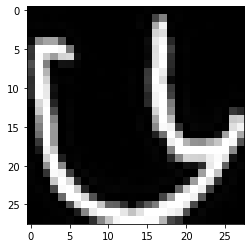

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

show_img = dataset_image[0].reshape(28, 28)
plt.imshow(show_img, cmap='gray')
print(dataset_label[0])

**Train and Test Data Split**

In [ ]:
train_image, test_image,train_label,test_label = train_test_split(dataset_image, dataset_label, test_size=0.1)
print(len(train_image))
print(len(train_label))
print(len(test_image))
print(len(test_label))

27747
27747
3083
3083


**Ziping Train, Test Data and Label**

In [ ]:
train_dataset = list(zip(test_image,train_label))
test_dataset = list(zip(test_image,test_label))

#**Experiment 1:**
* **Optimizer =SGD**
* **Learning rate =0.0001**


**Hyperparameters**

In [ ]:
#HYPERPERAMETERS
batch_size = 256
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.0001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**MAKING DATASET ITERABLE**

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

**Logistic Regression Model**

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

**INSTANTIATE MODEL CLASS**

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)

**Optimizer setup**

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


**Function TRAIN THE MODEL**

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), round(accuracy, 2)))

Iteration: 500. Loss: 0.6908424496650696. Accuracy: 51.99
Iteration: 1000. Loss: 0.6893777251243591. Accuracy: 52.09
Iteration: 1500. Loss: 0.683989942073822. Accuracy: 51.83
Iteration: 2000. Loss: 0.6994321346282959. Accuracy: 52.19
Iteration: 2500. Loss: 0.6977075338363647. Accuracy: 52.03
Iteration: 3000. Loss: 0.6857379674911499. Accuracy: 51.51
Iteration: 3500. Loss: 0.6856712102890015. Accuracy: 51.48
Iteration: 4000. Loss: 0.6950100660324097. Accuracy: 51.41


**Loss show**

[0.6908424496650696, 0.6893777251243591, 0.683989942073822, 0.6994321346282959, 0.6977075338363647, 0.6857379674911499, 0.6856712102890015, 0.6950100660324097]


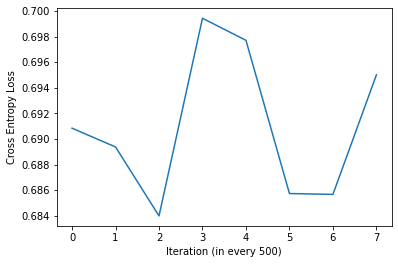

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Experiment 2:**
* **Optimizer =SGD**
* **Learning rate =0.0005**


**Hyperparameters**

In [ ]:
#HYPERPERAMETERS
batch_size = 256
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.0005

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**MAKING DATASET ITERABLE**

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

**Logistic Regression Model**

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

**INSTANTIATE MODEL CLASS**

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)

**Optimizer setup**

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


**Function TRAIN THE MODEL**

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), round(accuracy, 2)))

Iteration: 500. Loss: 0.6974784731864929. Accuracy: 52.48
Iteration: 1000. Loss: 0.6825542449951172. Accuracy: 51.74
Iteration: 1500. Loss: 0.7036118507385254. Accuracy: 51.09
Iteration: 2000. Loss: 0.7018072605133057. Accuracy: 50.73
Iteration: 2500. Loss: 0.6974782943725586. Accuracy: 50.37
Iteration: 3000. Loss: 0.692642092704773. Accuracy: 49.4
Iteration: 3500. Loss: 0.6929709911346436. Accuracy: 49.43
Iteration: 4000. Loss: 0.6840822100639343. Accuracy: 50.02


**Loss show**

[0.6974784731864929, 0.6825542449951172, 0.7036118507385254, 0.7018072605133057, 0.6974782943725586, 0.692642092704773, 0.6929709911346436, 0.6840822100639343]


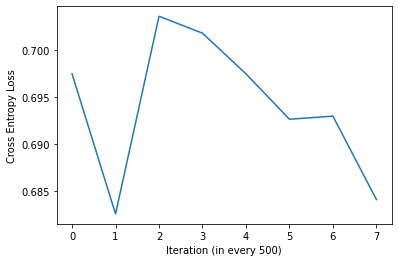

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Experiment 3:**
* **Optimizer =SGD**
* **Learning rate =0.0010**


**Hyperparameters**

In [ ]:
#HYPERPERAMETERS
batch_size = 256
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.0010

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**MAKING DATASET ITERABLE**

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

**Logistic Regression Model**

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

**INSTANTIATE MODEL CLASS**

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)

**Optimizer setup**

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


**Function TRAIN THE MODEL**

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), round(accuracy, 2)))

Iteration: 500. Loss: 0.6841294765472412. Accuracy: 50.92
Iteration: 1000. Loss: 0.6837232112884521. Accuracy: 49.72
Iteration: 1500. Loss: 0.6935368180274963. Accuracy: 49.59
Iteration: 2000. Loss: 0.6817538738250732. Accuracy: 50.11
Iteration: 2500. Loss: 0.6724648475646973. Accuracy: 49.43
Iteration: 3000. Loss: 0.6770821213722229. Accuracy: 50.05
Iteration: 3500. Loss: 0.6774747371673584. Accuracy: 50.41
Iteration: 4000. Loss: 0.676094114780426. Accuracy: 49.92


**Loss show**

[0.6841294765472412, 0.6837232112884521, 0.6935368180274963, 0.6817538738250732, 0.6724648475646973, 0.6770821213722229, 0.6774747371673584, 0.676094114780426]


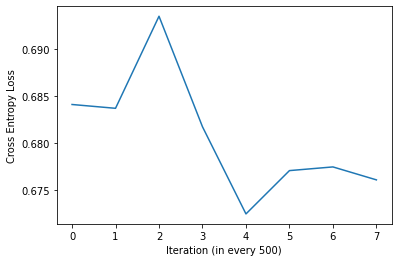

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Experiment 4:**
* **Optimizer =Adam**
* **Learning rate =0.0001**


**Hyperparameters**

In [ ]:
#HYPERPERAMETERS
batch_size = 256
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.0001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**MAKING DATASET ITERABLE**

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

**Logistic Regression Model**

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

**INSTANTIATE MODEL CLASS**

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)

**Optimizer setup**

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


**Function TRAIN THE MODEL**

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), round(accuracy, 2)))

Iteration: 500. Loss: 0.6848145127296448. Accuracy: 51.15
Iteration: 1000. Loss: 0.6747705936431885. Accuracy: 50.15
Iteration: 1500. Loss: 0.6767639517784119. Accuracy: 50.15
Iteration: 2000. Loss: 0.6497737169265747. Accuracy: 50.79
Iteration: 2500. Loss: 0.6474394202232361. Accuracy: 50.34
Iteration: 3000. Loss: 0.6546799540519714. Accuracy: 50.79
Iteration: 3500. Loss: 0.6469826102256775. Accuracy: 50.08
Iteration: 4000. Loss: 0.6632315516471863. Accuracy: 51.05


**Loss show**

[0.6848145127296448, 0.6747705936431885, 0.6767639517784119, 0.6497737169265747, 0.6474394202232361, 0.6546799540519714, 0.6469826102256775, 0.6632315516471863]


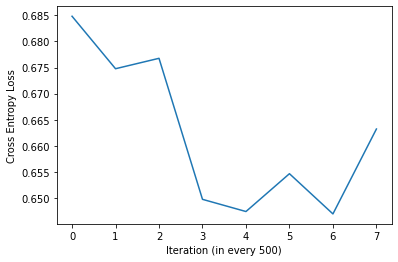

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Experiment 5:**
* **Optimizer =Adam**
* **Learning rate =0.02**


**Hyperparameters**

In [ ]:
#HYPERPERAMETERS
batch_size = 256
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.02

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**MAKING DATASET ITERABLE**

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

**Logistic Regression Model**

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

**INSTANTIATE MODEL CLASS**

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)

**Optimizer setup**

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


**Function TRAIN THE MODEL**

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), round(accuracy, 2)))

Iteration: 500. Loss: 0.7139192819595337. Accuracy: 50.96
Iteration: 1000. Loss: 0.6222255825996399. Accuracy: 49.85
Iteration: 1500. Loss: 0.658583402633667. Accuracy: 51.22
Iteration: 2000. Loss: 0.5988099575042725. Accuracy: 50.92
Iteration: 2500. Loss: 0.6515288352966309. Accuracy: 51.83
Iteration: 3000. Loss: 0.743750274181366. Accuracy: 48.85
Iteration: 3500. Loss: 0.7010840773582458. Accuracy: 50.11
Iteration: 4000. Loss: 0.6737802028656006. Accuracy: 50.86


**Loss show**

[0.7139192819595337, 0.6222255825996399, 0.658583402633667, 0.5988099575042725, 0.6515288352966309, 0.743750274181366, 0.7010840773582458, 0.6737802028656006]


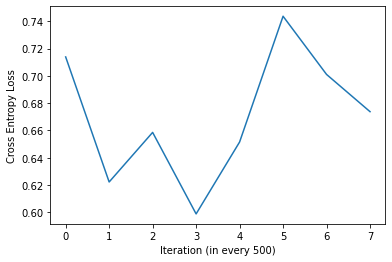

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Experiment 6:**
* **Optimizer =Adam**
* **Learning rate =0.05**


**Hyperparameters**

In [ ]:
#HYPERPERAMETERS
batch_size = 256
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.05

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**MAKING DATASET ITERABLE**

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

**Logistic Regression Model**

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

**INSTANTIATE MODEL CLASS**

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)

**Optimizer setup**

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


**Function TRAIN THE MODEL**

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), round(accuracy, 2)))

Iteration: 500. Loss: 0.9300315380096436. Accuracy: 49.95
Iteration: 1000. Loss: 1.0349936485290527. Accuracy: 52.48
Iteration: 1500. Loss: 0.8274070620536804. Accuracy: 49.79
Iteration: 2000. Loss: 0.707048773765564. Accuracy: 49.79
Iteration: 2500. Loss: 0.8096100091934204. Accuracy: 52.25
Iteration: 3000. Loss: 0.7424330711364746. Accuracy: 51.7
Iteration: 3500. Loss: 0.698421061038971. Accuracy: 50.37
Iteration: 4000. Loss: 0.7185676693916321. Accuracy: 48.3


**Loss show**

[0.9300315380096436, 1.0349936485290527, 0.8274070620536804, 0.707048773765564, 0.8096100091934204, 0.7424330711364746, 0.698421061038971, 0.7185676693916321]


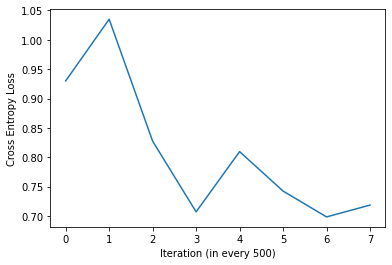

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()